# Import packages

In [6]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import pandas as pd
import numpy as np

import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

from spacy import displacy

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

# import Counter for counting:
from collections import Counter

# Read data

In [7]:
notebook_dir = os.getcwd()
rel_path = '../../data/complete_data/minutes_cleaned_spy_tnx.csv'

dataset=pd.read_csv(os.path.join(notebook_dir, rel_path), parse_dates=['date'])

In [8]:
dataset['contents'] = dataset['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())

# The following function extract all the different entities and labels present in the text

In [9]:
def dataset_parsing():
    '''
  This function calls the MonetaryPolicyCommittee module of the FedTools package
  to collect FOMC Statements. These statements are parsed using SpaCy.

  Inputs: N/A.

  Outputs: dataset: a Pandas DataFrame which contains:

  'FOMC_Statements' - original FOMC Statements downloaded by FedTools.
  'tokenised_data' - tokenised FOMC Statements.
  'lemmatised_data' - lematised FOMC Statements.
  'part_of_speech' - part of speech tags from FOMC Statements.
  'named_entities' - the named entities detected within the FOMC Statements.
  'labels' - the corresponding labels associated with named_entities.
  'number_of_labels' - a dictionary displaying the number of each label detected.
  'items' - the number of times each item is detected within the FOMC Statements.

  '''

  # collect FOMC Statements into DataFrame called dataset:
    global dataset

    # remove additional operators within the text:


    # initialise empty lists:
    tokens = []
    lemma = []
    pos = []
    ents = []
    labels = []
    count = []
    items = []

  # for each document in the pipeline:
    for doc in tqdm(nlp.pipe(dataset['contents'].astype('unicode').values, batch_size=50)):
      # if the document is successfully parsed:
        if doc.is_parsed:
          # append various data to appropriate categories:
            tokens.append([n.text for n in doc])
            lemma.append([n.lemma_ for n in doc])
            pos.append([n.pos_ for n in doc])
            ents.append([n.text for n in doc.ents])
            labels.append([n.label_ for n in doc.ents])
            count.append(Counter([n.label_ for n in doc.ents]))
            items.append(Counter([n.text for n in doc.ents]))

      # if document parsing fails, return 'None' to maintain DataFrame dimensions:
        else:
            tokens.append(None)
            lemma.append(None)
            pos.append(None)
            ents.append(None)
            labels.append(None)
            count.append(None)
            items.append(None)

  # now assign the lists columns within the dataframe:
    dataset['tokenised_data'] = tokens
    dataset['lemmatised_data'] = lemma
    dataset['part_of_speech'] = pos
    dataset['named_entities'] = ents
    dataset['labels'] = labels
    dataset['number_of_labels'] = count
    dataset['items'] = items

    return dataset

In [10]:
dataset_parsing()

/var/folders/z_/5fj7_z3n12dg5t3n8g2f7mzc0000gn/T/ipykernel_50466/1028118556.py:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm(nlp.pipe(dataset['contents'].astype('unicode').values, batch_size=50)):


0it [00:00, ?it/s]

/var/folders/z_/5fj7_z3n12dg5t3n8g2f7mzc0000gn/T/ipykernel_50466/1028118556.py:39: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if doc.is_parsed:


,date,contents,speaker,title,cleaned content,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+14,^TNX: d-1,^TNX: d+0,tokenised_data,lemmatised_data,part_of_speech,named_entities,labels,number_of_labels,items
0,1993-02-03,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",25.864302,26.137705,26.247074,26.228840,26.228840,...,25.809616,6.460,6.450,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, DATE, TI...","{'ORG': 261, 'GPE': 42, 'DATE': 190, 'TIME': 2...","{'the Federal Open Market Committee': 5, 'the ..."
1,1993-03-23,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.242849,26.297777,26.297777,26.462597,26.316092,...,26.371048,5.960,5.910,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, DATE, TIME, PE...","{'ORG': 80, 'GPE': 40, 'DATE': 142, 'TIME': 2,...","{'the Federal Open Market Committee': 1, 'the ..."
2,1993-05-18,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",25.876577,25.858253,26.389338,26.462597,26.224543,...,26.206207,6.070,6.150,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, DATE, DATE, TI...","{'ORG': 75, 'GPE': 34, 'DATE': 125, 'TIME': 4,...","{'the Federal Open Market Committee': 1, 'the ..."
3,1993-07-07,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.096867,26.170630,26.465714,26.539474,26.521048,...,26.521048,5.800,5.800,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, DATE, TI...","{'ORG': 109, 'GPE': 38, 'DATE': 223, 'TIME': 5...","{'the Federal Open Market Committee': 1, 'the ..."
4,1993-08-17,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.779240,26.871473,27.019003,27.019003,27.037449,...,27.184990,5.680,5.700,"[A, meeting, of, the, Federal, Open, Market, C...","[a, meeting, of, the, Federal, Open, Market, C...","[DET, NOUN, ADP, DET, PROPN, PROPN, PROPN, PRO...","[the Federal Open Market Committee, the Board ...","[ORG, ORG, ORG, GPE, GPE, DATE, TIME, PERSON, ...","{'ORG': 80, 'GPE': 35, 'DATE': 137, 'TIME': 2,...","{'the Federal Open Market Committee': 1, 'the ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2021-07-28,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,"['Federal', 'Reserve', 'central', 'bank', 'Uni...",436.076019,435.897186,437.705048,435.579376,434.665497,...,441.072388,1.234,1.261,"[The, Federal, Reserve, ,, the, central, bank,...","[the, Federal, Reserve, ,, the, central, bank,...","[DET, PROPN, PROPN, PUNCT, DET, ADJ, NOUN, ADP...","[The Federal Reserve, the United States, Pract...","[ORG, GPE, ORG, ORG, ORG, WORK_OF_ART, ORG, OR...","{'ORG': 272, 'GPE': 39, 'WORK_OF_ART': 5, 'CAR...","{'The Federal Reserve': 1, 'the United States'..."
236,2021-09-22,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes,"['Federal', 'Reserve', 'central', 'bank

# Creates column containing information about the extracted features 

In [11]:
def generate_additional_information():
    '''
  This function generates additional information from the parsed documents, quantifying
  the usage of specific named entities within FOMC Statements.

  Inputs: N/A.

  Outputs: dataset: a Pandas DataFrame which contains:

  'person' - the number of times people are mentioned in each statement.
  'date' - the number of times dates are mentioned within each statement.
  'percent' - the number of times percentages are mentioned within each statement.
  'time' - the number of times a time is mentioned within each statement.
  'ordinal' - the number of times an 'ordinal' ie) "first" is mentioned within each statement.
  'organisations' - the number of times an organisation is mentioned within each statement.
  'money' - the number of times money is mentioned within each statement.
  'event' - the number of times an event is mentioned within each statement.
  'law' - the number of times a law is mentioned within each statement.
  'quantity' - the number of times a quantity is mentioned within each statement.
  'groups' - the number of times specific groups are mentioned within each statement.
  'information_content' -  the number of named entities detected within each statement.

  '''
  # call the function defined above:
    global dataset

  # generate additional information through the detection of named entities:
    dataset['person'] = dataset['number_of_labels'].apply(lambda x: x.get('PERSON'))
    dataset['nb_dates'] = dataset['number_of_labels'].apply(lambda x: x.get('DATE'))
    dataset['percent'] = dataset['number_of_labels'].apply(lambda x: x.get('PERCENT'))
    dataset['product'] = dataset['number_of_labels'].apply(lambda x: x.get('PRODUCT'))
    dataset['time'] = dataset['number_of_labels'].apply(lambda x: x.get('TIME'))
    dataset['ordinal'] = dataset['number_of_labels'].apply(lambda x: x.get('ORDINAL'))
    dataset['organisations'] = dataset['number_of_labels'].apply(lambda x: x.get('ORG'))
    dataset['money'] = dataset['number_of_labels'].apply(lambda x: x.get('MONEY'))
    dataset['event'] = dataset['number_of_labels'].apply(lambda x: x.get('EVENT'))
    dataset['law'] = dataset['number_of_labels'].apply(lambda x: x.get('LAW'))
    dataset['quantity'] = dataset['number_of_labels'].apply(lambda x: x.get('QUANTITY'))
    dataset['groups'] = dataset['number_of_labels'].apply(lambda x: x.get('NORP'))

    # replace any 'NaN' values with 0, then calculate the 'information content',as defined
    # by the total number of named entities:
    dataset = dataset.replace(np.nan, 0)
    dataset['information_content'] = dataset.iloc[:,8:].sum(axis = 1)

    return dataset

In [12]:
dataset=generate_additional_information()

/var/folders/z_/5fj7_z3n12dg5t3n8g2f7mzc0000gn/T/ipykernel_50466/370742472.py:44: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset['information_content'] = dataset.iloc[:,8:].sum(axis = 1)


## This is a nice display of the text using the models tools

In [13]:
displacy.render(nlp(dataset['contents'][103]), jupyter = True, style = 'ent')

# Create the label, did  the S&P go up or down a week after the announcement 

In [14]:
def pct_change_from_day_0(announcement):
    try: 
        pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
        if pct_change>0:
            return 1
        else:
            return 0
    except: 
        return None
pct_change_from_day_0(dataset.iloc[141])

dataset['+7change']=dataset.apply(pct_change_from_day_0,axis=1)

In [15]:
newdata = dataset.select_dtypes(include='number')

In [17]:
input_data=newdata[['SPY: d+0','person', 'nb_dates', 'percent', 'product', 'time',
       'ordinal', 'organisations', 'money', 'event', 'law', 'quantity',
       'groups', 'information_content']]

In [19]:
labels=dataset['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

# Split the data into train, validation and test data, so that it can train a neural network

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data.to_numpy(),labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

216 24 216 24


In [21]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

194 22 194 22


In [23]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (14,1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-14 18:41:45.370439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-14 18:41:45.371055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2022-03-14 18:41:45.801018: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-14 18:41:47.499969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:41:47.816840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:41:48.130302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:41:48.263250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 2s - loss: 0.3353 - accuracy: 0.4100

2022-03-14 18:41:48.488094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.4175

2022-03-14 18:41:49.166120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:41:49.263362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 911ms/step - loss: 0.3384 - accuracy: 0.4175 - val_loss: 0.2406 - val_accuracy: 0.6364
Epoch 2/30
2/2 [==============================] - 0s 45ms/step - loss: 0.2942 - accuracy: 0.4948 - val_loss: 0.2396 - val_accuracy: 0.6364
Epoch 3/30
1/2 [==============>...............] - ETA: 0s - loss: 0.2990 - accuracy: 0.4700

2022-03-14 18:41:49.397467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 45ms/step - loss: 0.2953 - accuracy: 0.4691 - val_loss: 0.2385 - val_accuracy: 0.6364
Epoch 4/30
2/2 [==============================] - 0s 44ms/step - loss: 0.2863 - accuracy: 0.5773 - val_loss: 0.2374 - val_accuracy: 0.6364
Epoch 5/30
2/2 [==============================] - 0s 44ms/step - loss: 0.2875 - accuracy: 0.5206 - val_loss: 0.2363 - val_accuracy: 0.6364
Epoch 6/30
2/2 [==============================] - 0s 46ms/step - loss: 0.2956 - accuracy: 0.4794 - val_loss: 0.2356 - val_accuracy: 0.6364
Epoch 7/30
2/2 [==============================] - 0s 45ms/step - loss: 0.2870 - accuracy: 0.5309 - val_loss: 0.2349 - val_accuracy: 0.6364
Epoch 8/30
2/2 [==============================] - 0s 43ms/step - loss: 0.3059 - accuracy: 0.4639 - val_loss: 0.2343 - val_accuracy: 0.6364
Epoch 9/30
2/2 [==============================] - 0s 42ms/step - loss: 0.2720 - accuracy: 0.5567 - val_loss: 0.2338 - val_accuracy: 0.6364
Epoch 10/30
2/2 [=====================

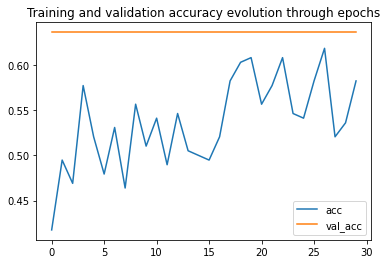

In [24]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()

## Results on the test set

In [25]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 72ms/step - loss: 0.2341 - accuracy: 0.6250


[0.23410563170909882, 0.625]